In [1]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math

In [2]:
def generalised_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=dft(N)
        #print(gtm)
    if transform_type==1:
        gtm=dcft(N)
        #print(gtm)
    if transform_type==2:
        gtm=haar(N)
        #print(gtm)
    return gtm*x    
        
        


In [3]:
def generalised_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=idft(N)
    if transform_type==1:
        igtm=idcft(N)
    if transform_type==2:
        igtm=ihaar(N)
    return igtm*X 

In [4]:
def dft(N):#returns dft matrix
    dft_matrix=np.empty([N,N],dtype=np.complex_)
    dft_matrix=np.matrix(dft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dft_matrix[k,n]=np.exp(-(1j)*2*np.pi*k*n/N)
        
    return dft_matrix

In [5]:
def idft(N):#returns idft matrix
    idft_matrix=np.empty([N,N],dtype=np.complex_)
    idft_matrix=np.matrix(idft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            idft_matrix[k,n]=np.exp((1j)*2*np.pi*k*n/N)
    idft_matrix=idft_matrix/N        
    return idft_matrix

In [6]:
def dcft(N):#returns dcft matrix
    dcft_matrix=np.empty([N,N],dtype=np.complex_)
    dcft_matrix=np.matrix(dcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dcft_matrix[k,n]=2*np.cos(np.pi*k*(2*n+1)/(2*N))
        
    return dcft_matrix

In [7]:
def idcft(N):#returns idcft matrix
    idcft_matrix=np.empty([N,N],dtype=np.complex_)
    idcft_matrix=np.matrix(idcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices: 
        for n in indices:
            if n==0:
                alpha=0.5
            else:
                alpha=1
            idcft_matrix[k,n]=alpha*np.cos(np.pi*n*(2*k+1)/(2*N))
    idcft_matrix=idcft_matrix/N
    return idcft_matrix

In [8]:
def mse(transform_type,x,X,N):
    err=[]
    for l in range(0,N,1):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=generalised_inverse_transform(0,Xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(2,Xm)
        err=np.append(err,dot_product(x,xm,N))
    return err 

In [9]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [10]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [11]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [12]:
def haar(N):
    if N==2:
        h2=np.matrix([[1,1],[1,-1]])
        return h2
    else:
      v=np.log2(N)-1
      h_u=np.kron(haar(2**(v)),[1,1])
      h_l=np.kron(((2**(v/2))*np.eye(int(2**v))),[1,-1])
      #print(h_u.shape,h_l.shape)
      return np.concatenate((h_u,h_l),axis=0)

In [13]:
N = 4
v=np.log2(N)-1
v

1.0

In [14]:
def ihaar(N):
    haar_matrix=haar(N)
    return np.transpose(haar_matrix)/N

0
(128,)
1


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(128,)
2
(128,)


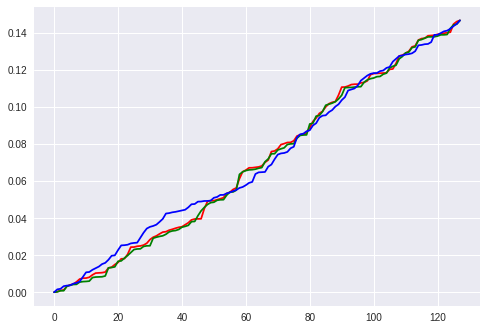

In [57]:
# input sequence generator
length=128
real=np.random.rand(length)
img=np.random.rand(length)
x=real+1j*img
x=np.matrix(x)
x=np.transpose(x)
color=['r','g','b']
for i in range(0,3,1):
    X=generalised_transform(i,x)
    print(i)#X
    err=mse(i,x,X,length)
    print(err.shape)
    plt.plot(np.arange(0,length,1),err,color[i])

#y=generalised_inverse_transform(0,X)

